<h1 style="color:purple; text-align:center;">Lead Scoring Case Study - July 2023</h1> 
<h2 style="color:purple;">Group Members:</h2>

<ul>
    <li style="color:purple;">Vikas Tunwal</li>
    <li style="color:purple;">Anuj Kumar Tiwari</li>
    <li style="color:purple;">Trang Thuy Van </li>
</ul>

<h2 style="color:purple;">Problem Statement:</h2>

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:


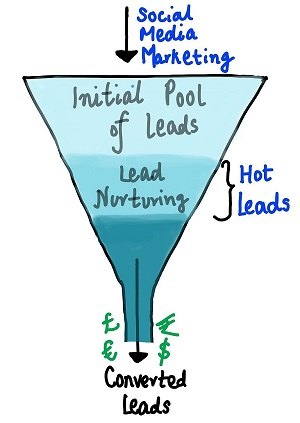

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

 

Goals of the Case Study
There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 

Results Expected
A well-commented Jupyter note with at least the logistic regression model, the conversion predictions and evaluation metrics.
The word document filled with solutions to all the problems.
The overall approach of the analysis in a presentation
Mention the problem statement and the analysis approach briefly 
Explain the results in business terms
Include visualisations and summarise the most important results in the presentation
A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.
 

You need to submit the following four components:

Python commented file: Should include detailed comments and should not contain unnecessary pieces of code.
Word File: Answer all the questions asked by the company in the word document provided.
Presentation:  Make a presentation to present your analysis to the chief data scientist of your company (and thus you should include both technical and business aspects). The presentation should be concise, clear, and to the point. Submit the presentation after converting it into PDF format.
PDF File: Write the summary report in a word file and submit it as a PDF.


## Importanting the required libaries and packages

In [1]:
# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# #Increase the limit for #columns
# pd.options.display.max_columns = None
# pd.options.display.max_rows = 150
# pd.options.display.float_format = '{:.2f}'.format

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

<h1 style="color:blue;">Reading and Understanding the data</h1>

In [2]:
#loading the dataset
df_leads = pd.read_csv('Leads.csv')

In [3]:
#let's look at the first few entries from the dataset
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
#Let's understand the structure, datatypes and null values in our dataset
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# let's look at the statistical summary of the dataset
df_leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

<h1 style="color:blue;">Data preparations and EDA</h1>

In [6]:
#check for any duplicates
print("No. of duplicate entries in the dataset = ", df_leads.duplicated().sum())

No. of duplicate entries in the dataset =  0


<font color = "purple">
No duplicate rows are observed

 As mentioned in the problem statement `"Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?)"` we need to replace this with NaN

In [7]:
# let's convert the value 'Select' to NaN as it is a result of no selections from 'non-mandatory dropdown fields'
df_leads = df_leads.replace('Select', np.nan)


 <font color=purple>
    Let's inspect the dataset for columns having null values.

In [8]:
#Let's inspect the dataset for null values
cols_with_nulls = df_leads.isnull().mean() * 100
cols_with_nulls [cols_with_nulls > 0.00].sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [9]:
#let's identify the columns with more than 40% missing values
cols_to_drop = list(cols_with_nulls[cols_with_nulls>40].index)
cols_to_drop

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

<font color=purple>
    Let's also check the correlation using Heatmap to visualise the correlation amog the features

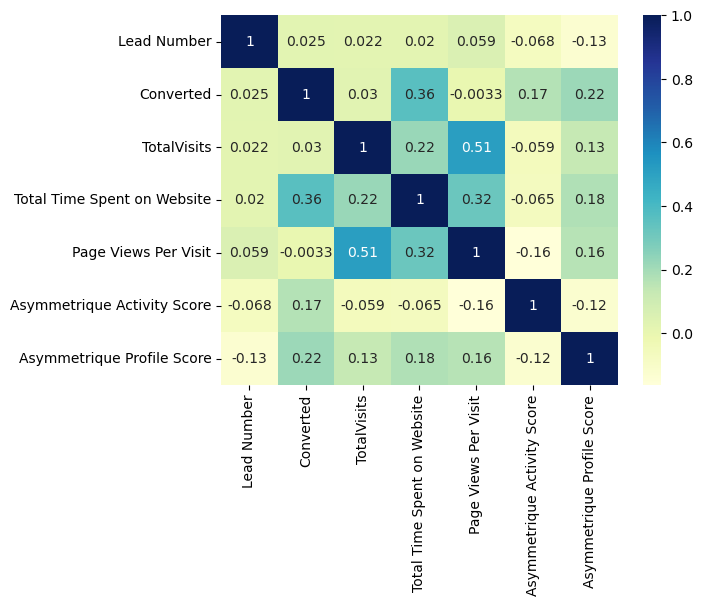

In [10]:
# Checking corelation for numerical columns
sns.heatmap(df_leads.corr(),annot=True,cmap="YlGnBu")
plt.show()

<font color = "blue">
We can safely drop the columns with more than 40% null values as they would be insignificant in deriving inferences. Depending on the model performance, we can further revisit the correlation and see if treating the null values for some of the features which are having fractional correlation with the target variable. For now, we take the threshold of 40% to drop the columns.

In [11]:
#Making a list of columns to be removed, we are adding few more columns which seem insignificant
cols_to_drop.extend(['Prospect ID','Lead Number', 'City', 'Country']) 
cols_to_drop

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'Prospect ID',
 'Lead Number',
 'City',
 'Country']

In [12]:
#drop the identified columns from dataframe
df_leads = df_leads.drop(labels = cols_to_drop, axis=1)

In [13]:
df_leads.shape

(9240, 26)

In [14]:
df_leads.head(5)

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  ... Newspaper  \
0  Page Visited on Website                      NaN  ...        No   
1             Email Opened                      NaN  ...        No   
2             Email Opened  Business Administration  ...        No   
3              Unreachable    Media and Advertising  ...        No   
4        Converted to Lead                      NaN  ...        No   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  Receive More Updates About Our Courses                                 Tags  \
0                                     No          Interested in other courses   
1                                     No                              Ringing   
2                                     No  Will revert after reading the email   
3                                     No                              Ringing   
4                                     No  Will revert after reading the email   

  Update me on Supply Chain Content Get updates on DM Content  \
0                                No                        No   
1                                No                        No   
2                                No                        No   
3                                No                        No   
4                                No                        No   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 26 columns]

In [15]:
#Let's inspect the dataset again for null values
cols_with_nulls = df_leads.isnull().mean() * 100
cols_with_nulls [cols_with_nulls > 0.00].sort_values(ascending=False)

Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

<font color="blue">
Inspecting feature: Specialization

In [16]:
# percentage distribution of values for the 'Specialization' column
df_leads['Specialization'].value_counts(normalize=True) * 100


Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [17]:
#imputing the missing values as 'Others'
df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan, 'Others')

In [18]:
df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan, 'Others')

In [19]:
df_leads['Specialization'].value_counts(normalize=True) * 100

Others                               36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

<font color="blue">
Inspecting feature: Tags

In [20]:
# percentage distribution of values for the 'Tags' column
df_leads['Tags'].value_counts(normalize=True) * 100


Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [21]:
#imputing the missing values as 'Will revert after reading the email'
df_leads['Tags'] = df_leads['Tags'].replace(np.nan, 'Will revert after reading the email')

<font color="blue">
Inspecting feature: What matters most to you in choosing a course

In [22]:
# percentage distribution of values for the 'What matters most to you in choosing a course' column
df_leads['What matters most to you in choosing a course'].value_counts(normalize=True) * 100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [23]:
# we can impute the missing value with the mode for the column
df_leads['What matters most to you in choosing a course'] = df_leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

<font color="blue">
Inspecting feature: What is your current occupation

In [24]:
# percentage distribution of values for the 'What is your current occupation' column
df_leads['What is your current occupation'].value_counts(normalize=True) * 100


Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [25]:
# we can impute the missing value with the mode for the column
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [26]:
# Identifying the categorical columns
categorical_columns = df_leads.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

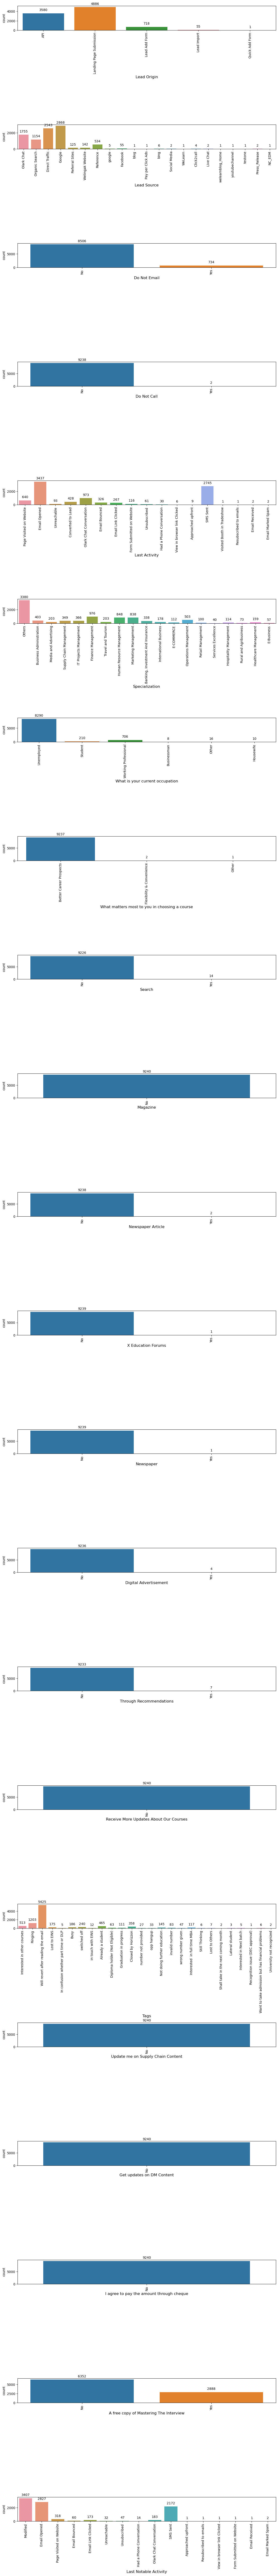

In [27]:
# Setting up the grid for the subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), figsize=(12, 5*len(categorical_columns)))

# Looping through categorical columns and creating a plot for each
for ax, column in zip(axes, categorical_columns):
    # Creating the countplot
    sns.countplot(x=column, data=df_leads, ax=ax)
    
    # Setting the x-label as the column name
    ax.set_xlabel(column, fontsize=12)
    
    # Rotating x-axis labels for readability
    ax.tick_params(axis='x', rotation=90)
    
    # Annotating the bars with their respective heights
    for patch in ax.patches:
        ax.annotate(f'{patch.get_height():.0f}', 
                    (patch.get_x() + patch.get_width() / 2., patch.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

# Adjusting the layout to prevent overlap
fig.tight_layout()
plt.show()


From the above visualization, we can see that there two categores of columns which can be dropped

1. Columns with only one value:

- 'I agree to pay the amount through cheque',
- 'Get updates on DM Content',
- 'Update me on Supply Chain Content',
- 'Receive More Updates About Our Courses',
- 'Magazine'



2. Columns which are highly skewed

- 'Do Not Call',
- 'Search',
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper',
- 'Digital Advertisement',
- 'Through Recommendations'.

In [28]:
# drop the columns
cols_to_drop = ['Magazine',
                'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content',
                'Get updates on DM Content',
                'I agree to pay the amount through cheque',
                'Do Not Call',
                'Search',
                'Newspaper Article',
                'X Education Forums',
                'Newspaper',
                'Digital Advertisement',
                'Through Recommendations']

df_leads.drop(cols_to_drop,axis=1,inplace=True)
df_leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [29]:
#Let's inspect the dataset for null values
cols_with_nulls = df_leads.isnull().mean() * 100
cols_with_nulls [cols_with_nulls > 0.00].sort_values(ascending=False)

TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
Lead Source             0.389610
dtype: float64

In [30]:
#we impute the missing values with the median for the column 'Page View Per Visit'
df_leads['Page Views Per Visit'] = df_leads['Page Views Per Visit'].replace(np.nan, df_leads['Page Views Per Visit'].median())

In [31]:
#we impute the missing values with the median for the column 'TotalVisits'
df_leads['TotalVisits'] = df_leads['TotalVisits'].replace(np.nan, df_leads['TotalVisits'].median())

In [32]:
# For rest of the missing values, we just drop them
df_leads.dropna(inplace = True)

In [33]:
#Let's inspect the dataset for null values
cols_with_nulls = df_leads.isnull().mean() * 100
cols_with_nulls [cols_with_nulls > 0.00].sort_values(ascending=False)

Series([], dtype: float64)

<font color = blue>
    We see no more missing values in the DataFrame.
    



## Univariate Analysis

#### For column's Country, What is your current occupation and What matters most to you in choosing a course the values looks highly skewed towards India, Unemployed and Better Career Prospects respectively so it would be safe to drop these columns

In [34]:
df_leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

                                  Tags A free copy of Mastering The Interview  \
0          Interested in other courses                                     No   
1                              Ringing                                     No   
2  Will revert after reading the email                                    Yes   
3                              Ringing                                     No   
4  Will revert after reading the email                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

#### Checking different categories of categorical column

In [35]:
# Obtain numerical and categorical columns from the DataFrame
num_cols = list(df_leads.describe().columns)
cat_cols = [x for x in list(df_leads.columns) if x not in num_cols]

# Create a summary of categorical columns
cat_desc = df_leads[cat_cols].describe().T

# Calculate the percentage of the most frequent value in each categorical column
cat_desc['top_perc'] = 100 * cat_desc['freq'] / cat_desc['count']

# Sort the cat_desc DataFrame in descending order of top_perc
cat_desc_sorted = cat_desc.sort_values(by='top_perc', ascending=False)
cat_desc_sorted


count unique  \
What matters most to you in choosing a course  9103      3   
Do Not Email                                   9103      2   
What is your current occupation                9103      6   
A free copy of Mastering The Interview         9103      2   
Tags                                           9103     26   
Lead Origin                                    9103      4   
Last Activity                                  9103     17   
Specialization                                 9103     19   
Last Notable Activity                          9103     16   
Lead Source                                    9103     21   

                                                                               top  \
What matters most to you in choosing a course              Better Career Prospects   
Do Not Email                                                                    No   
What is your current occupation                                         Unemployed   
A free copy of Mastering The Interview                                          No   
Tags                                           Will revert after reading the email   
Lead Origin                                                Landing Page Submission   
Last Activity                                                         Email Opened   
Specialization                                                              Others   
Last Notable Activity                                                     Modified   
Lead Source                                                                 Google   

                                               freq   top_perc  
What matters most to you in choosing a course  9101  99.978029  
Do Not Email                                   8382  92.079534  
What is your current occupation                8182  89.882456  
A free copy of Mastering The Interview         6215  68.274195  
Tags                                           5360  58.881687  
Lead Origin                                    4885  53.663627  
Last Activity                                  3432  37.701857  
Specialization                                 3300  36.251785  
Last Notable Activity                          3296  36.207844  
Lead Source                                    2868  31.506097

In [36]:
# let's drop column's with values skewed more than 90%
drop_cols = list(cat_desc[cat_desc['top_perc'] > 90].index)
drop_cols

['Do Not Email', 'What matters most to you in choosing a course']

In [37]:
df_leads= df_leads.drop(labels = drop_cols, axis=1)

In [38]:
df_leads.head(3)

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   

            Specialization What is your current occupation  \
0                   Others                      Unemployed   
1                   Others                      Unemployed   
2  Business Administration                         Student   

                                  Tags A free copy of Mastering The Interview  \
0          Interested in other courses                                     No   
1                              Ringing                                     No   
2  Will revert after reading the email                                    Yes   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened

In [39]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   Specialization                          9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   Tags                                    9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   obje

#### Mapping 'Yes': 1, 'No': 0 for the columns with only Yes and No

In [40]:
# Define a mapping function for binary values
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Apply the binary mapping function to the specified variables in the df_leads DataFrame
df_leads[['A free copy of Mastering The Interview']] = df_leads[['A free copy of Mastering The Interview']].apply(binary_map)


In [41]:
df_leads.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Others                      Unemployed   
1                   Others                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Others                      Unemployed   

                                  Tags  \
0          Interested in other courses   
1                              Ringing   
2  Will revert after reading the email   
3                              Ringing   
4  Will revert after reading the email   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

### Let's check for the otliers in the numerical columns 


In [42]:
df_leads.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9103.000000  9103.000000                  9103.000000   
mean      0.379216     3.454575                   483.773921   
std       0.485219     4.851123                   545.519186   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   247.000000   
75%       1.000000     5.000000                   924.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  
count           9103.000000                             9103.000000  
mean               2.368972                                0.317258  
std                2.157526                                0.465434  
min                0.000000                                0.000000  
25%                1.000000                                0.000000  
50%                2.000000                                0.000000  
75%                3.000000                                1.000000  
max               55.000000                                1.000000

We can see that the columns 'TotalVisits', 'Page View Per Visit' and 'Total Time Spent on Website' shows a significant deviation for the max from 75% of the data. This indicates presence of outliers. We can observe the same by plotting them.

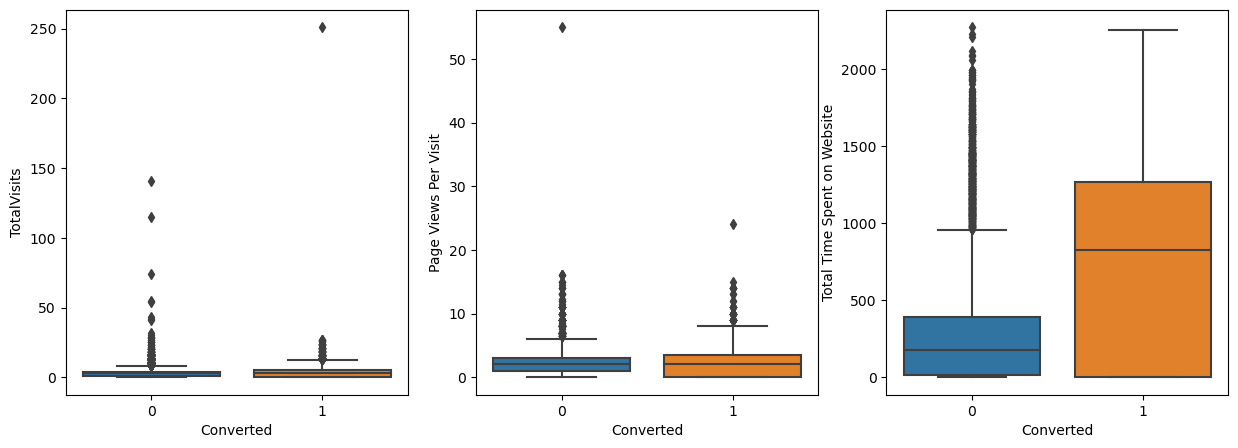

In [43]:
#let's visualize the columns via boxplot
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

In [44]:
# Identify outliers in the 'TotalVisits' column and cap them at the 95th percentile
percentiles = df_leads['TotalVisits'].quantile([0.05, 0.90]).values
lower_cutoff = percentiles[0]
upper_cutoff = percentiles[1]

# Cap the outliers below the lower cutoff
df_leads.loc[df_leads['TotalVisits'] <= lower_cutoff, 'TotalVisits'] = lower_cutoff

# Cap the outliers above the upper cutoff
df_leads.loc[df_leads['TotalVisits'] >= upper_cutoff, 'TotalVisits'] = upper_cutoff


In [45]:
# Identify outliers in the 'Page Views Per Visit' column and cap them at the 95th percentile
percentiles = df_leads['Page Views Per Visit'].quantile([0.05, 0.95]).values
lower_cutoff = percentiles[0]
upper_cutoff = percentiles[1]

# Cap the outliers below the lower cutoff
df_leads.loc[df_leads['Page Views Per Visit'] <= lower_cutoff, 'Page Views Per Visit'] = lower_cutoff

# Cap the outliers above the upper cutoff
df_leads.loc[df_leads['Page Views Per Visit'] >= upper_cutoff, 'Page Views Per Visit'] = upper_cutoff


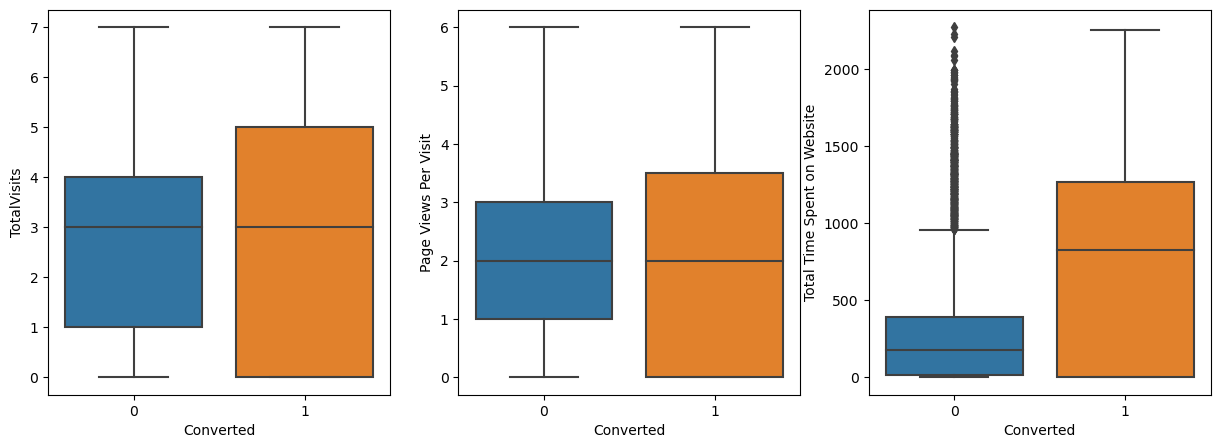

In [46]:
#let's visualize the columns via boxplot
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

### Bivariate Analysis

### Let's check the distribution of catagorical columns now

In [47]:
cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']
cat_cols = [x for x in list(df_leads.columns) if x not in cols]


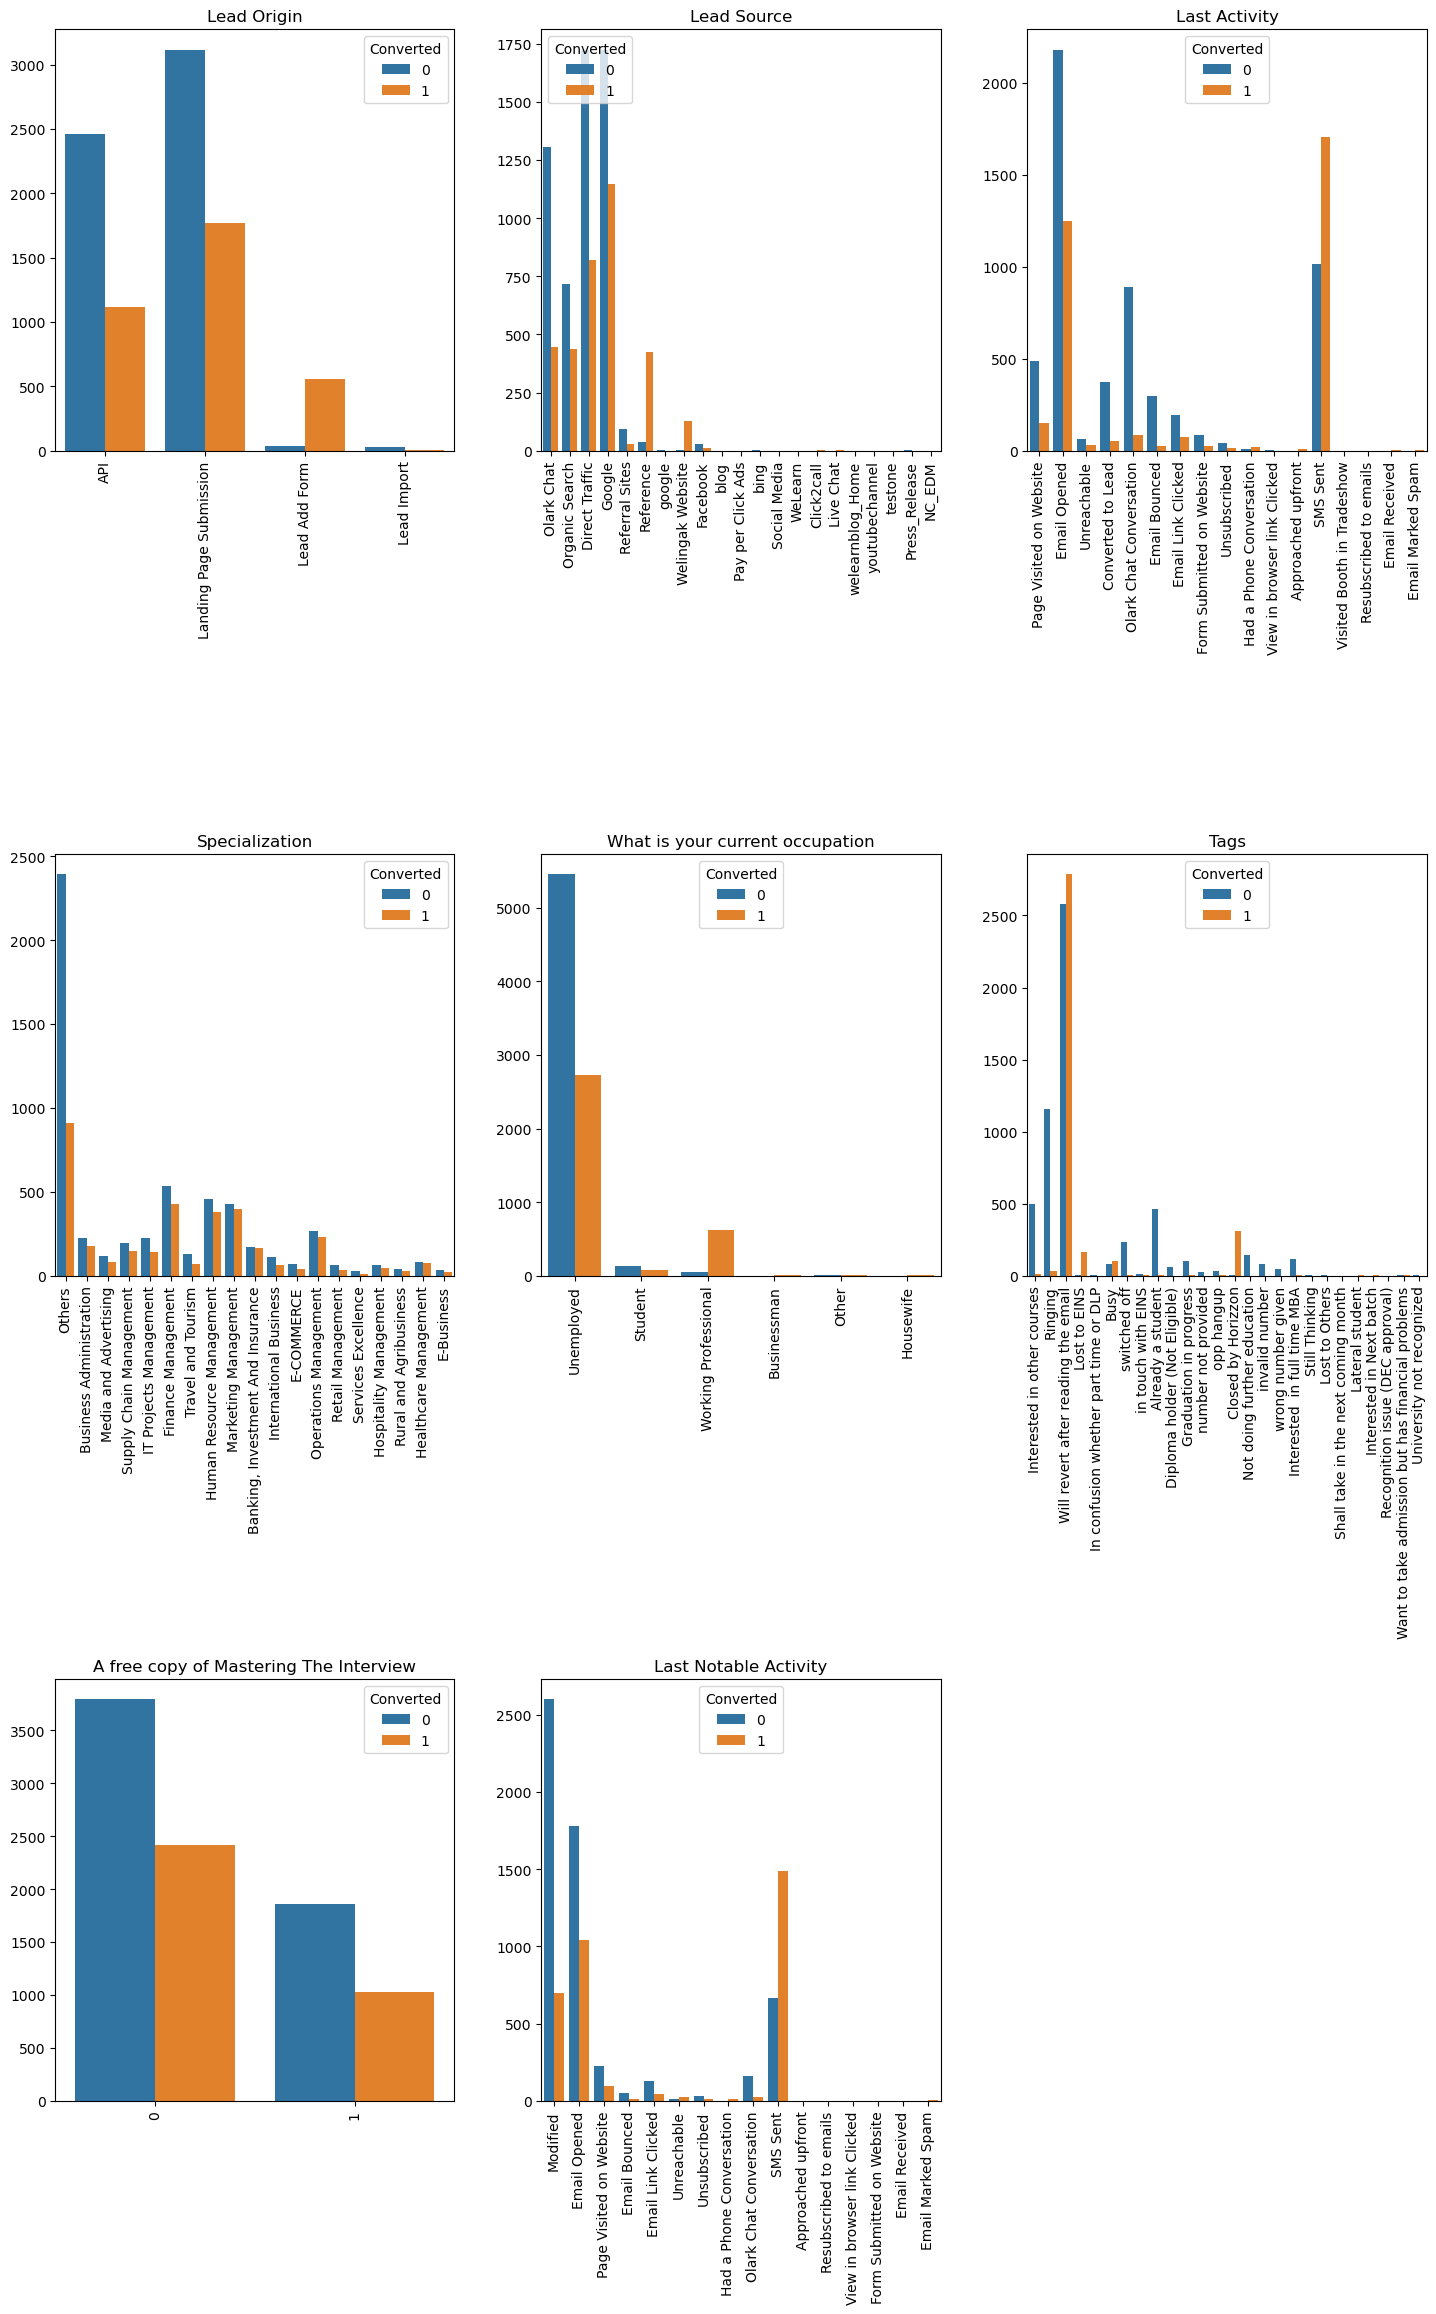

In [48]:
plt.figure(figsize=[15, 30])
num_cat_cols = df_leads[cat_cols].shape[1]
# Generate count plots for each categorical column
for i in range(num_cat_cols):
    plt.subplot(4, 3, i + 1)
    sns.countplot(df_leads[cat_cols].iloc[:, i], hue=df_leads["Converted"])
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation=90)
    plt.title(df_leads[cat_cols].columns[i])
    plt.tight_layout(pad=3.0)


#### For the features showing distribution near zero

In [49]:
# Replace certain values in the 'Tags' column with 'Other_Tags'
tags_to_replace = ['In confusion whether part time or DLP', 'in touch with EINS', 'Diploma holder (Not Eligible)',
                   'Approached upfront', 'Graduation in progress', 'number not provided', 'opp hangup',
                   'Still Thinking', 'Lost to Others', 'Shall take in the next coming month', 'Lateral student',
                   'Interested in Next batch', 'Recognition issue (DEC approval)',
                   'Want to take admission but has financial problems', 'University not recognized']
df_leads['Tags'] = df_leads['Tags'].replace(tags_to_replace, 'Other_Tags')

# Replace specific values in the 'Lead Source' column with 'Google' and 'Others'
df_leads['Lead Source'] = df_leads['Lead Source'].replace(['google'], 'Google')
other_lead_sources = ['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
                      'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel', 'Facebook']
df_leads['Lead Source'] = df_leads['Lead Source'].replace(other_lead_sources, 'Others')

# Replace certain values in the 'Last Activity' column with 'Other_Activity'
activity_to_replace = ['Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow',
                       'Approached upfront', 'Resubscribed to emails', 'Email Received', 'Email Marked Spam',
                       'Unsubscribed']
df_leads['Last Activity'] = df_leads['Last Activity'].replace(activity_to_replace, 'Other_Activity')

# Replace certain values in the 'Specialization' column with 'Other_Specialization'
specializations_to_replace = ['Others', 'E-Business', 'Rural and Agribusiness', 'Services Excellence']
df_leads['Specialization'] = df_leads['Specialization'].replace(specializations_to_replace, 'Other_Specialization')

# Replace specific values in the 'What is your current occupation' column with 'Other_Occupation'
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(['Other', 'Housewife'], 'Other_Occupation')

# Replace certain values in the 'Last Notable Activity' column with 'Other_Activity'
notable_activities_to_replace = ['Email Bounced', 'Email Marked Spam', 'Email Received', 'Form Submitted on Website',
                                 'Had a Phone Conversation', 'Resubscribed to emails', 'Unreachable', 'Unsubscribed',
                                 'View in browser link Clicked']
df_leads['Last Notable Activity'] = df_leads['Last Notable Activity'].replace(notable_activities_to_replace, 'Other_Activity')


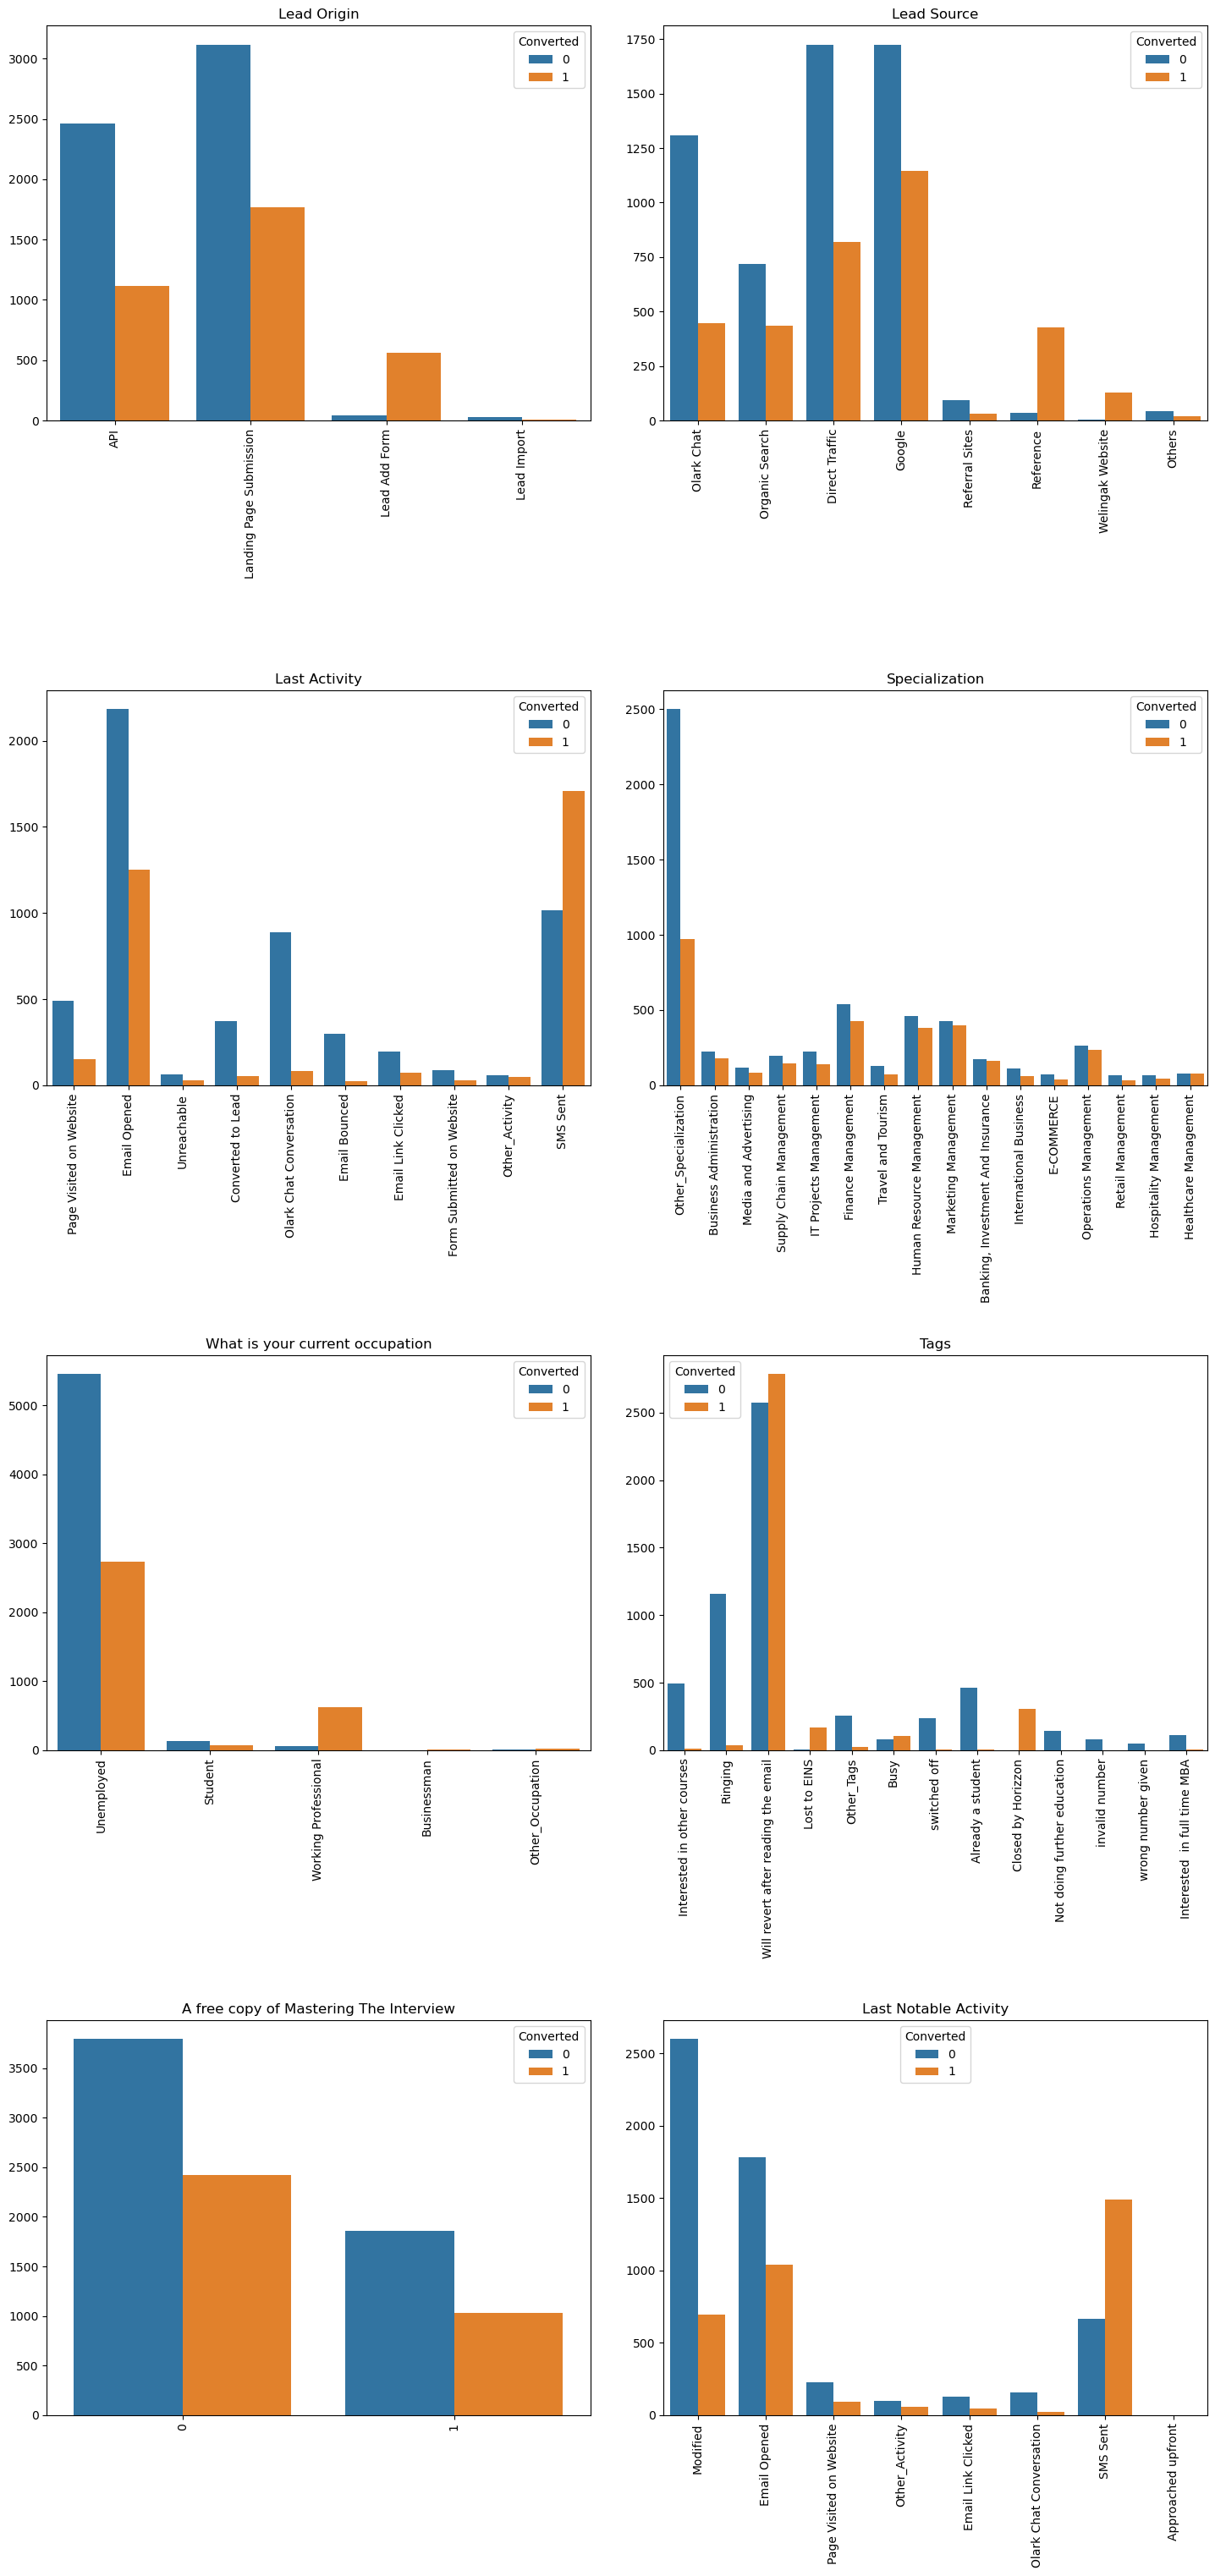

In [50]:
# let's verify the distribution of catagorical columns again
    
plt.figure(figsize=[15, 45])

for i, col in enumerate(cat_cols):
    plt.subplot(6, 2, i+1)
    sns.countplot(x=col, hue="Converted", data=df_leads)
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation=90)
    plt.title(col)

plt.tight_layout(pad=3.0)

### Let's create Dummy Variables for the categorical columns

In [51]:
# Obtaining the list of numerical columns
num_cols = list(df_leads.describe().columns)

# Obtaining the list of categorical columns
cat_cols = [col for col in df_leads.columns if col not in num_cols]

# Generating descriptive statistics for categorical columns
cat_desc = df_leads[cat_cols].describe().T

# Creating a list of column names suitable for creating dummy variables
col_dummy = list(cat_desc.index)


In [52]:
# Create dummy variables for selected categorical variables, dropping the first one
dummy1 = pd.get_dummies(df_leads[col_dummy], drop_first=True)

# Add the dummy variable results to the master dataframe
df_leads = pd.concat([df_leads, dummy1], axis=1)


In [53]:
# Remove the original categorical variables from the dataframe
df_leads = df_leads.drop(labels=col_dummy, axis=1)

# Display the first 5 rows of the updated dataframe
df_leads.head(5)


Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  ...  \
0                        0                   0                       1  ...   
1                        0                   0                       0  ...   
2                        0                   0                       0  ...   
3                        0                   0                       0  ...   
4                        0                   1                       0  ...   

   Tags_invalid number  Tags_switched off  Tags_wrong number given  \
0                    0                  0                        0   
1                    0                  0                        0   
2                    0                  0                        0   
3                    0                  0                        0   
4                    0                  0                        0   

   Last Notable Activity_Email Link Clicked  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   
2                                   1                               0   
3                                   0                               1   
4                                   0                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Other_Activity  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 62 columns]

#### Checking Catagorical Columns

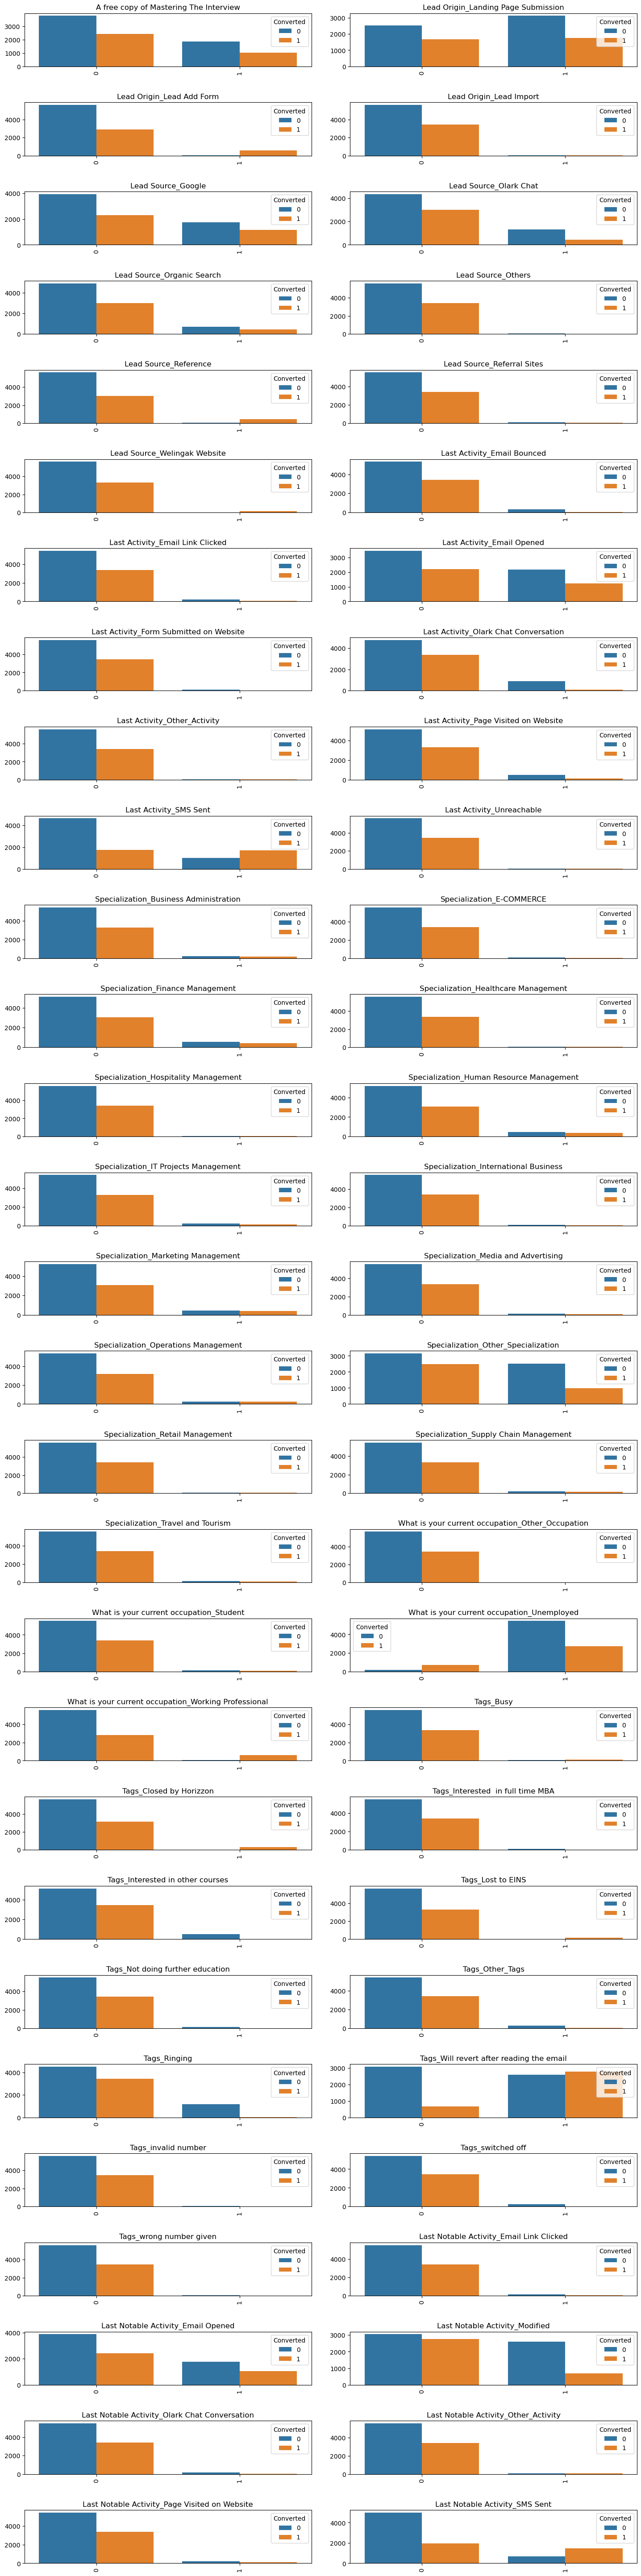

In [54]:
# Extraction of non-numeric columns
numeric_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']
categorical_variables = [variable for variable in df_leads.columns if variable not in numeric_columns]

# Initialize the figure dimensions
plt.figure(figsize=[15, 200])
total_categorical_vars = len(categorical_variables)

# Create count plots for each of the categorical variables
for index in range(total_categorical_vars):
    plt.subplot(100, 2, index+1)
    sns.countplot(x=categorical_variables[index], data=df_leads, hue="Converted")
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation=90)
    plt.title(categorical_variables[index])
    plt.tight_layout(pad=3.0)


##### Some important inferences: -

###### The presence of the following features often indicates a higher likelihood of lead conversion:
- Tags_Closed by Horizzon
- Tags_Lost to EINS
- Tags_Will revert after reading the email
- Tags_Busy
- Lead Origin_Lead Add Form

###### Contrarily, the presence of the following features typically signals a lower chance of lead conversion:
- Tags_switched off
- Last Notable Activity_Olark Chat Conversation

### Test-Train Split

In [55]:
# let's segregate the dependent and independent variables
X = df_leads.drop(columns=['Converted'])
y = df_leads['Converted']


In [56]:
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  ...  Tags_invalid number  Tags_switched off  \
0                           0  ...                    0                  0   
1                           1  ...                    0                  0   
2                           0  ...                    0                  0   
3                           0  ...                    0                  0   
4                           0  ...                    0                  0   

   Tags_wrong number given  Last Notable Activity_Email Link Clicked  \
0                        0                                         0   
1                        0                                         0   
2                        0                                         0   
3                        0                                         0   
4                        0                                         0   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   
2                                   1                               0   
3                                   0                               1   
4                                   0                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Other_Activity  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 61 c

In [57]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [58]:
# Splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling of Features

In [59]:
columns_to_scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


# Instantiate the object
scaler_instance = StandardScaler()
# Apply fit_transform
X_train[columns_to_scale] = scaler_instance.fit_transform(X_train[columns_to_scale])


In [60]:
X_train.head()


TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
7963     1.716235                     2.486792              0.132767   
5521     1.716235                    -0.836090              2.075837   
1951     0.015018                     1.828055              0.410348   
1553     0.440322                     1.307999             -0.144815   
9170    -1.260895                    -0.890832             -1.255140   

      A free copy of Mastering The Interview  \
7963                                       1   
5521                                       0   
1951                                       0   
1553                                       0   
9170                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
7963                                    1                          0   
5521                                    1                          0   
1951                                    0                          0   
1553                                    1                          0   
9170                                    0                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
7963                        0                   0                       0   
5521                        0                   0                       0   
1951                        0                   1                       0   
1553                        0                   1                       0   
9170                        0                   0                       1   

      Lead Source_Organic Search  ...  Tags_invalid number  Tags_switched off  \
7963                           0  ...                    0                  0   
5521                           0  ...                    0                  0   
1951                           0  ...                    0                  0   
1553                           0  ...                    0                  0   
9170                           0  ...                    0                  0   

      Tags_wrong number given  Last Notable Activity_Email Link Clicked  \
7963                        0                                         0   
5521                        0                                         0   
1951                        0                                         0   
1553                        0                                         0   
9170                        0                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
7963                                   0                               1   
5521                                   0                               0   
1951                                   1                               0   
1553                                   1                               0   
9170                                   1                               0   

      Last Notable Activity_Olark Chat Conversation  \
7963                                              0   
5521                                              0   
1951                                              0   
1553                                              0   
9170                                              0   

      Last Notable Activity_Other_Activity  \
7963                                     0   
5521                                     0   
1951                                     0   
1553                                     0   
9170                                     0   

      Last Notable Activity_Page Visited on Website  \
7963                                              0   
5521                                              1   
1951                                              0   
1553                                              0   
9170                                              0   

      Last Notable Activity_SMS Sent  
7963           

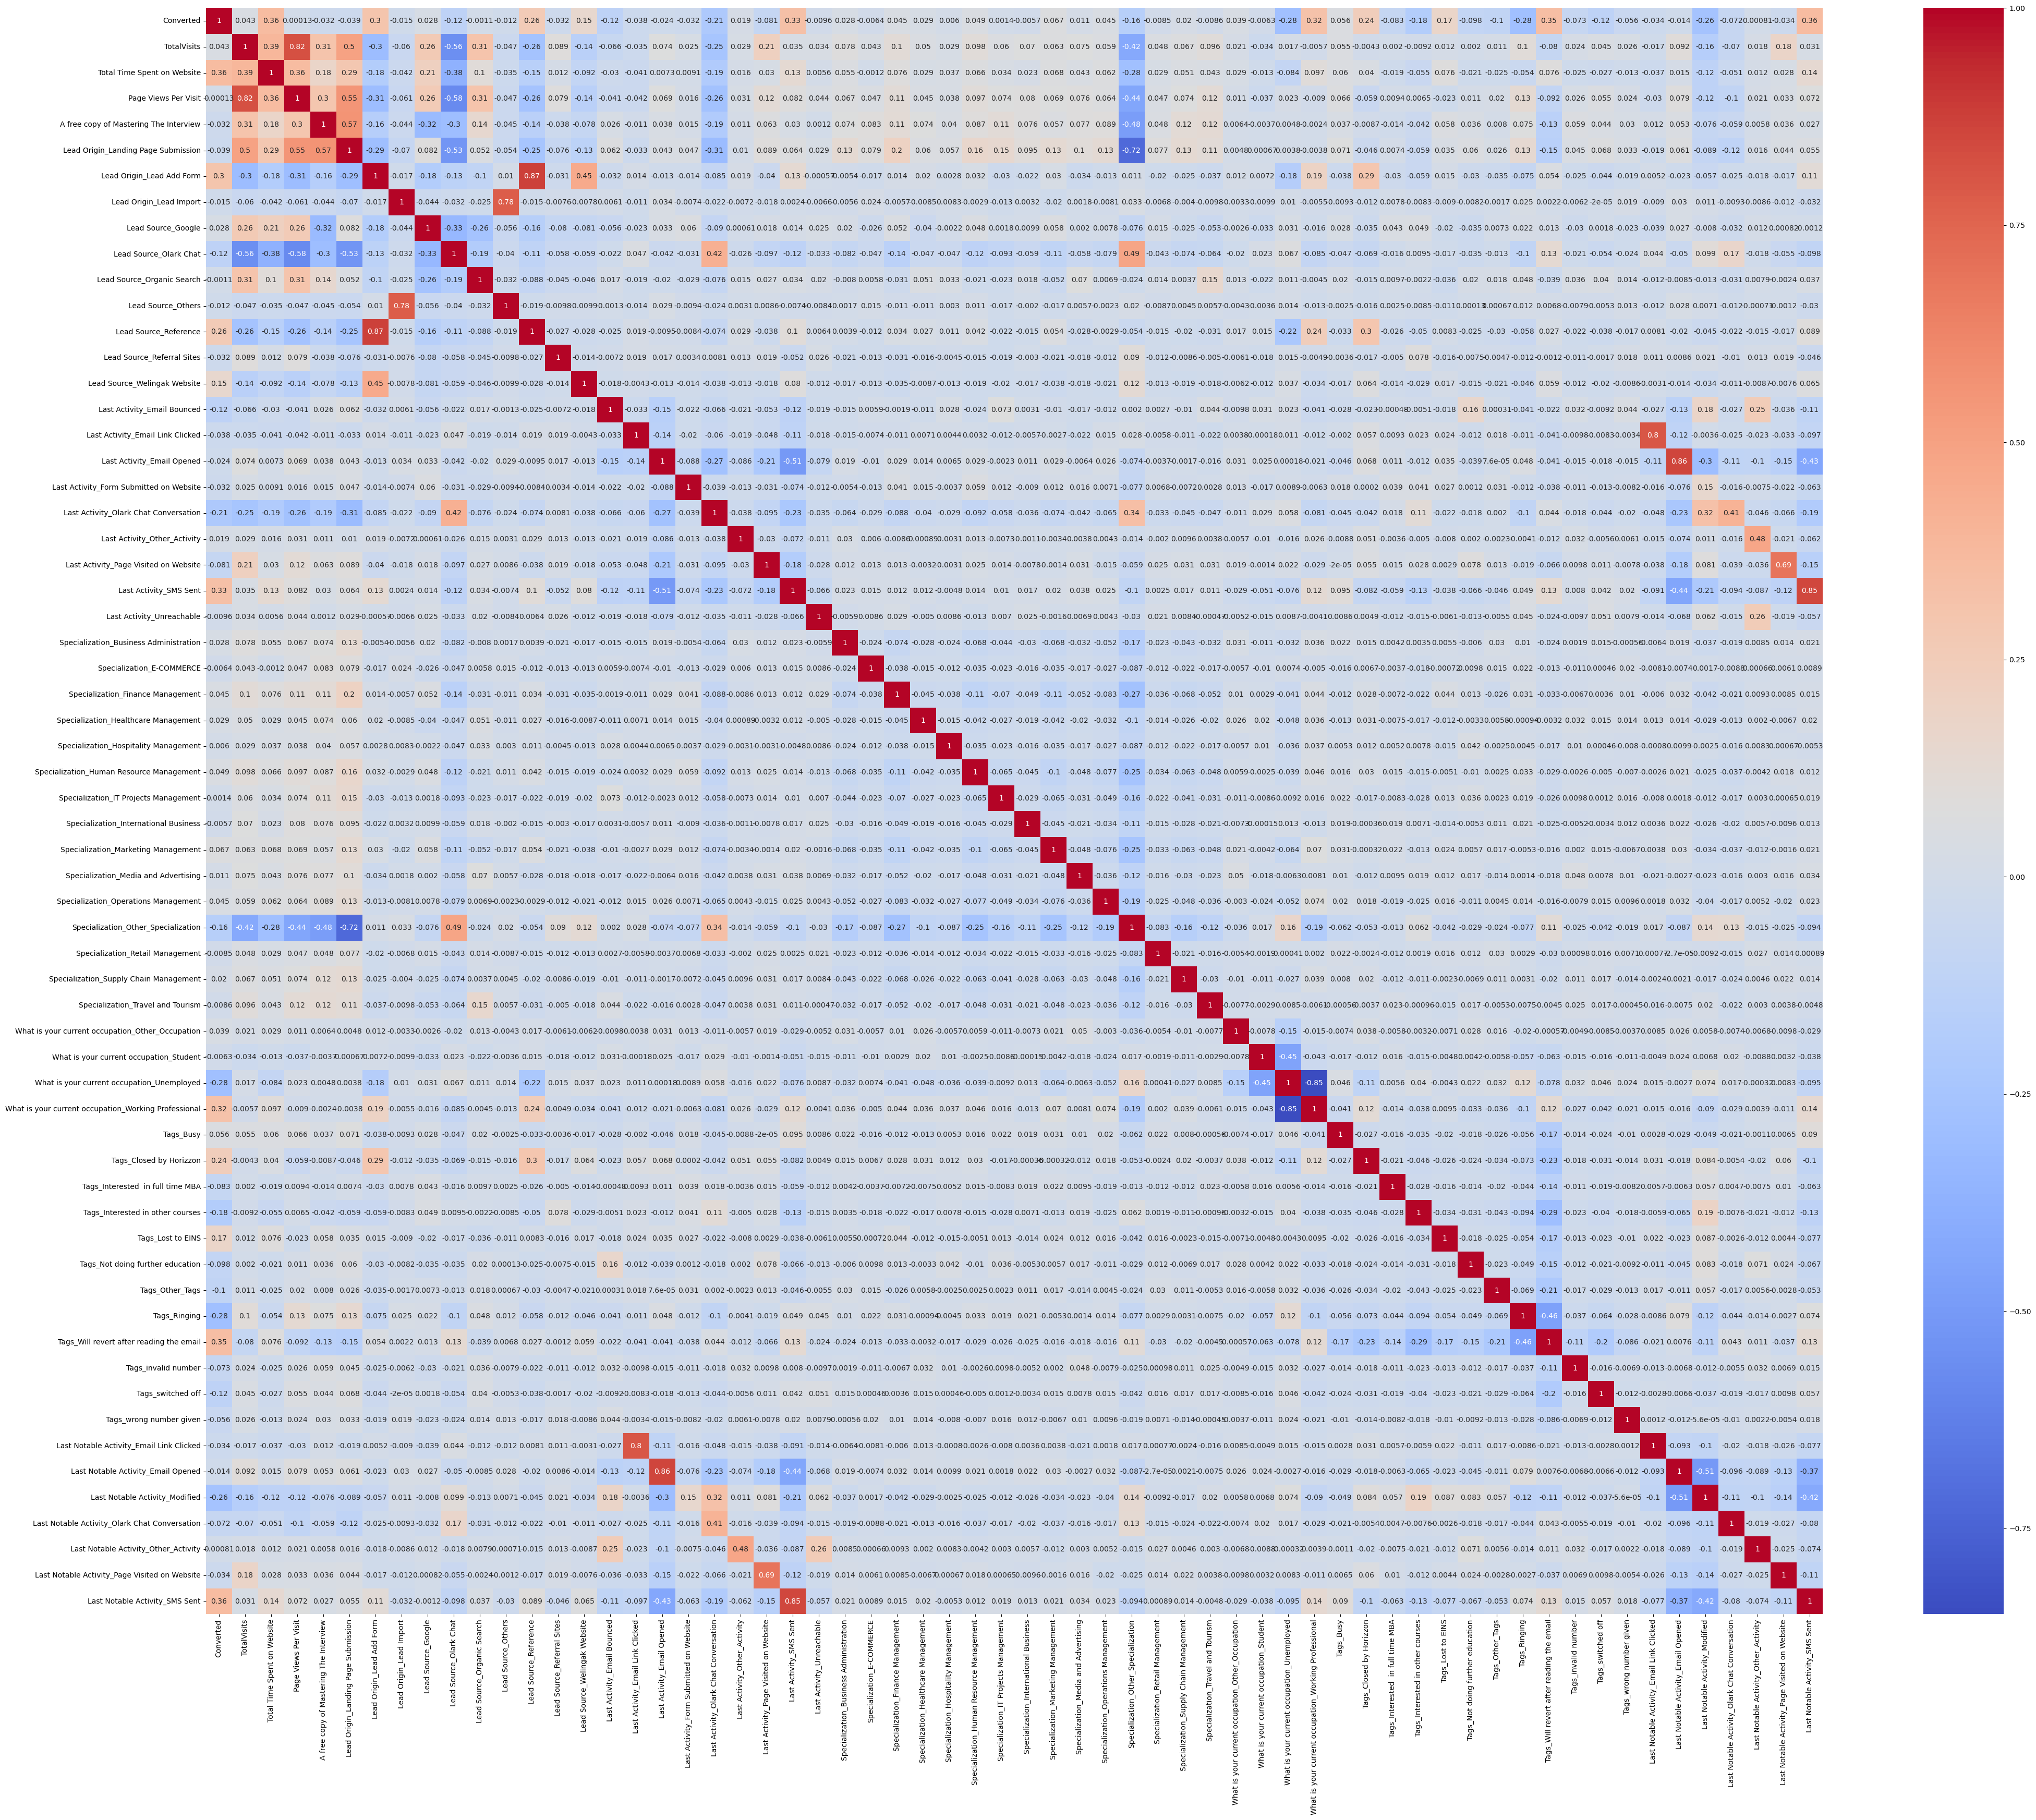

In [61]:
fig, ax = plt.subplots(figsize=(50, 40))
correlation_heatmap = sns.heatmap(df_leads.corr(), annot=True, cmap='coolwarm', ax=ax)
correlation_heatmap.plot()
plt.show()

<font color = purple>
    
**Key Insights from the Correlation:**



1. **'Converted' & 'Total Time Spent on Website' / 'Last Notable Activity_SMS Sent':** 
   - 'Converted' has a positive correlation with these factors. This suggests that the more time a person spends on the website, and if they received an SMS, they are more likely to convert.

    
2. **'TotalVisits' & 'Page Views Per Visit':**
   - These two are highly positively correlated. This implies that the more visits a user makes, the more pages they view per visit.

    
3. **'Total Time Spent on Website' & 'TotalVisits' / 'Page Views Per Visit':**
   - 'Total Time Spent on Website' is positively correlated with 'TotalVisits' and 'Page Views Per Visit', indicating that as users visit more pages and more frequently, they tend to spend more time on the website.

    
4. **'Converted' & 'A free copy of Mastering The Interview' / 'Last Notable Activity_Modified':**
   - 'Converted' has a negative correlation with these factors, which indicates that people who requested a free copy of the interview guide or had their last notable activity listed as 'Modified' are less likely to convert.

    
5. **'Lead Source_Olark Chat' & 'TotalVisits':**
   - There's also a strong negative correlation between these two. This could mean that the people who interact through Olark Chat tend to visit the website less frequently.


### Feature selection using RFE

In [62]:
#instantiate the object
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Specialization_Other_Specialization',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [63]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Business Administration',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing

# Model Building

### Model # 1

In [64]:
# Building the logistic regression model using the statsmodels library
X_train_with_const = sm.add_constant(X_train[col])
logistic_regression_model = sm.GLM(y_train, X_train_with_const, family = sm.families.Binomial())
model_result = logistic_regression_model.fit()
model_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1717.0
Date:                Mon, 17 Jul 2023   Deviance:                       3434.0
Time:                        18:05:01   Pearson chi2:                 1.15e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5478
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0066      0.359     -2.807      0.005      -1.709      -0.304
Total Time Spent on Website                              1.0569      0.048     21.896      0.000       0.962       1.151
Lead Origin_Landing Page Submission                     -1.4032      0.145     -9.653      0.000      -1.688      -1.118
Lead Origin_Lead Add Form                                2.4734      0.297      8.325      0.000       1.891       3.056
Lead Source_Welingak Website                             2.6124      1.060      2.465      0.014       0.535       4.690
Last Activity_Email Bounced                             -1.2307      0.340     -3.619      0.000      -1.897      -0.564
Specialization_Other_Specialization                     -1.2558      0.144     -8.697      0.000      -1.539      -0.973
What is your current occupation_Unemployed              -1.4545      0.322     -4.515      0.000      -2.086      -0.823
What is your current occupation_Working Professional     1.1155      0.406      2.750      0.006       0.320       1.911
Tags_Busy                                                3.1481      0.303     10.383      0.000       2.554       3.742
Tags_Closed by Horizzon                                  8.9149      1.036      8.602      0.000       6.884      10.946
Tags_Lost to EINS                                        8.4911      0.762     11.140      0.000       6.997       9.985
Tags_Ringing                                            -1.2359      0.306     -4.039      0.000      -1.836      -0.636
Tags_Will revert after reading the email                 3.4074      0.213     15.989      0.000       2.990       3.825
Tags_invalid number                                     -1.0650      1.072     -0.993      0.320      -3.166       1.036
Tags_switched off                                       -2.1590      0.762     -2.832      0.005      -3.653      -0.665
Tags_wrong number given                                -20.9050   1.16e+04     -0.002      0.999   -2.27e+04    2.27e+04
Last Notable Activity_Modified                          -1.1518      0.105    -10.959      0.000      -1.358      -0.946
Last Notable Activity_Olark Chat Conversation           -1.6717      0.366     -4.563      0.000      -2.390      -0.954
Last Notable Activity_Page Visited on Website           -0.8781      0.252     -3.489      0.000      -1.371      -0.385
Last Notable Activity_SMS Sent                           2.1126      0.123     17.213      0.000       1.872       2.353
========================================================================================================================
"""

#### Let's check VIF scores

In [65]:
vif_data = pd.DataFrame()
vif_data['Features'] = X_train[col].columns
vif_data['VIF'] = [variance_inflation_factor(X_train[col].values, index) for index in range(X_train[col].shape[1])]
vif_data['VIF'] = round(vif_data['VIF'], 2)

# Sorting the features based on the VIF values in descending order
vif_data = vif_data.sort_values(by = "VIF", ascending = False)

vif_data

Features    VIF
6          What is your current occupation_Unemployed  12.03
12           Tags_Will revert after reading the email   5.01
1                 Lead Origin_Landing Page Submission   4.81
5                 Specialization_Other_Specialization   3.55
16                     Last Notable Activity_Modified   2.14
11                                       Tags_Ringing   1.96
7   What is your current occupation_Working Profes...   1.93
2                           Lead Origin_Lead Add Form   1.86
19                     Last Notable Activity_SMS Sent   1.81
9                             Tags_Closed by Horizzon   1.39
3                        Lead Source_Welingak Website   1.35
0                         Total Time Spent on Website   1.23
14                                  Tags_switched off   1.20
8                                           Tags_Busy   1.17
10                                  Tags_Lost to EINS   1.13
18      Last Notable Activity_Page Visited on Website   1.10
4                         Last Activity_Email Bounced   1.09
17      Last Notable Activity_Olark Chat Conversation   1.08
13                                Tags_invalid number   1.07
15                            Tags_wrong number given   1.04

<font color=red>
    The below variables show high p-value

1. Tags_wrong number given - 0.999
2. Tags_invalid number - 0.320
3. Lead Source_Welingak Website - 0.014
    
    
Also, the variable `What is your current occupation_Unemployed` shows very high VIF
    

### Model # 2

In [66]:
# Exclude 'What is your current occupation_Unemployed' from the model due to high VIF 
col = col.drop('What is your current occupation_Unemployed', 1)

# Re-evaluate the model with the refined set of variables
X_train_sm = sm.add_constant(X_train[col])
logistic_regression_model_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logistic_regression_model_2.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1727.4
Date:                Mon, 17 Jul 2023   Deviance:                       3454.8
Time:                        18:05:01   Pearson chi2:                 1.14e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5463
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3101      0.232     -9.954      0.000      -2.765      -1.855
Total Time Spent on Website                              1.0593      0.048     22.006      0.000       0.965       1.154
Lead Origin_Landing Page Submission                     -1.3883      0.145     -9.599      0.000      -1.672      -1.105
Lead Origin_Lead Add Form                                2.5095      0.293      8.550      0.000       1.934       3.085
Lead Source_Welingak Website                             2.5629      1.059      2.420      0.016       0.488       4.638
Last Activity_Email Bounced                             -1.2295      0.342     -3.598      0.000      -1.899      -0.560
Specialization_Other_Specialization                     -1.2532      0.144     -8.708      0.000      -1.535      -0.971
What is your current occupation_Working Professional     2.5162      0.262      9.602      0.000       2.003       3.030
Tags_Busy                                                3.0076      0.299     10.047      0.000       2.421       3.594
Tags_Closed by Horizzon                                  8.7810      1.035      8.485      0.000       6.753      10.809
Tags_Lost to EINS                                        8.3546      0.760     10.991      0.000       6.865       9.844
Tags_Ringing                                            -1.3879      0.302     -4.590      0.000      -1.981      -0.795
Tags_Will revert after reading the email                 3.2763      0.209     15.711      0.000       2.868       3.685
Tags_invalid number                                     -1.2152      1.071     -1.135      0.257      -3.314       0.884
Tags_switched off                                       -2.3019      0.761     -3.024      0.002      -3.794      -0.810
Tags_wrong number given                                -21.0564   1.16e+04     -0.002      0.999   -2.27e+04    2.27e+04
Last Notable Activity_Modified                          -1.1559      0.105    -11.044      0.000      -1.361      -0.951
Last Notable Activity_Olark Chat Conversation           -1.6491      0.361     -4.565      0.000      -2.357      -0.941
Last Notable Activity_Page Visited on Website           -0.8970      0.252     -3.560      0.000      -1.391      -0.403
Last Notable Activity_SMS Sent                           2.0955      0.122     17.119      0.000       1.856       2.335
========================================================================================================================
"""

In [67]:

# Calculate and display the VIF values for each feature in the model
vif_data = pd.DataFrame()
vif_data['Features'] = X_train[col].columns
vif_data['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

Features   VIF
11           Tags_Will revert after reading the email  3.49
1                 Lead Origin_Landing Page Submission  3.15
5                 Specialization_Other_Specialization  2.60
15                     Last Notable Activity_Modified  1.94
2                           Lead Origin_Lead Add Form  1.80
18                     Last Notable Activity_SMS Sent  1.78
10                                       Tags_Ringing  1.61
3                        Lead Source_Welingak Website  1.34
8                             Tags_Closed by Horizzon  1.32
6   What is your current occupation_Working Profes...  1.24
0                         Total Time Spent on Website  1.23
13                                  Tags_switched off  1.14
7                                           Tags_Busy  1.11
9                                   Tags_Lost to EINS  1.10
4                         Last Activity_Email Bounced  1.09
17      Last Notable Activity_Page Visited on Website  1.09
16      Last Notable Activity_Olark Chat Conversation  1.07
12                                Tags_invalid number  1.05
14                            Tags_wrong number given  1.03

So overall the accuracy hasn't dropped much.

<font color=red>
    The below variables show high p-value

1. Tags_wrong number given - 0.999
2. Tags_invalid number - 0.257
3. Lead Source_Welingak Website - 0.016
    
    
The VIF score for the rest of the columns look ok.
    

### Model #3

In [68]:
# Exclude 'Tags_wrong number given' from the model due to high p-value 
col = col.drop('Tags_wrong number given', 1)

# Re-evaluate the model with the refined set of variables
X_train_sm = sm.add_constant(X_train[col])
logistic_regression_model_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logistic_regression_model_3.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1730.4
Date:                Mon, 17 Jul 2023   Deviance:                       3460.7
Time:                        18:05:01   Pearson chi2:                 1.14e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5459
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4004      0.232    -10.329      0.000      -2.856      -1.945
Total Time Spent on Website                              1.0604      0.048     22.027      0.000       0.966       1.155
Lead Origin_Landing Page Submission                     -1.3998      0.145     -9.663      0.000      -1.684      -1.116
Lead Origin_Lead Add Form                                2.5159      0.294      8.553      0.000       1.939       3.092
Lead Source_Welingak Website                             2.5536      1.059      2.411      0.016       0.478       4.629
Last Activity_Email Bounced                             -1.2315      0.342     -3.597      0.000      -1.903      -0.560
Specialization_Other_Specialization                     -1.2578      0.144     -8.728      0.000      -1.540      -0.975
What is your current occupation_Working Professional     2.5356      0.264      9.607      0.000       2.018       3.053
Tags_Busy                                                3.1165      0.298     10.472      0.000       2.533       3.700
Tags_Closed by Horizzon                                  8.8792      1.035      8.581      0.000       6.851      10.907
Tags_Lost to EINS                                        8.4537      0.760     11.123      0.000       6.964       9.943
Tags_Ringing                                            -1.2728      0.300     -4.246      0.000      -1.860      -0.685
Tags_Will revert after reading the email                 3.3777      0.208     16.273      0.000       2.971       3.784
Tags_invalid number                                     -1.0974      1.070     -1.026      0.305      -3.194       1.000
Tags_switched off                                       -2.1852      0.760     -2.875      0.004      -3.675      -0.695
Last Notable Activity_Modified                          -1.1558      0.105    -11.027      0.000      -1.361      -0.950
Last Notable Activity_Olark Chat Conversation           -1.6536      0.361     -4.575      0.000      -2.362      -0.945
Last Notable Activity_Page Visited on Website           -0.8978      0.252     -3.560      0.000      -1.392      -0.403
Last Notable Activity_SMS Sent                           2.0730      0.121     17.085      0.000       1.835       2.311
========================================================================================================================
"""

In [69]:
# Calculate and display the VIF values for each feature in the model
vif_data = pd.DataFrame()
vif_data['Features'] = X_train[col].columns
vif_data['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

Features   VIF
11           Tags_Will revert after reading the email  3.44
1                 Lead Origin_Landing Page Submission  3.11
5                 Specialization_Other_Specialization  2.58
14                     Last Notable Activity_Modified  1.94
2                           Lead Origin_Lead Add Form  1.80
17                     Last Notable Activity_SMS Sent  1.77
10                                       Tags_Ringing  1.59
3                        Lead Source_Welingak Website  1.34
8                             Tags_Closed by Horizzon  1.32
6   What is your current occupation_Working Profes...  1.24
0                         Total Time Spent on Website  1.23
13                                  Tags_switched off  1.14
7                                           Tags_Busy  1.11
9                                   Tags_Lost to EINS  1.10
4                         Last Activity_Email Bounced  1.09
16      Last Notable Activity_Page Visited on Website  1.09
15      Last Notable Activity_Olark Chat Conversation  1.07
12                                Tags_invalid number  1.04

<font color=red>
    The below variables show high p-value

1. Tags_invalid number - 0.305
2. Lead Source_Welingak Website - 0.016
    
    
The VIF score for the rest of the columns look ok.
    

### Model #4

In [70]:
# Exclude 'Tags_invalid numbe' from the model due to high p-value 
col = col.drop('Tags_invalid number', 1)

# Re-evaluate the model with the refined set of variables
X_train_sm = sm.add_constant(X_train[col])
logistic_regression_model_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logistic_regression_model_4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1731.1
Date:                Mon, 17 Jul 2023   Deviance:                       3462.1
Time:                        18:05:02   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5458
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4551      0.230    -10.685      0.000      -2.905      -2.005
Total Time Spent on Website                              1.0621      0.048     22.061      0.000       0.968       1.156
Lead Origin_Landing Page Submission                     -1.4052      0.145     -9.692      0.000      -1.689      -1.121
Lead Origin_Lead Add Form                                2.5213      0.295      8.559      0.000       1.944       3.099
Lead Source_Welingak Website                             2.5482      1.059      2.406      0.016       0.472       4.624
Last Activity_Email Bounced                             -1.2344      0.343     -3.603      0.000      -1.906      -0.563
Specialization_Other_Specialization                     -1.2602      0.144     -8.735      0.000      -1.543      -0.977
What is your current occupation_Working Professional     2.5470      0.265      9.612      0.000       2.028       3.066
Tags_Busy                                                3.1791      0.294     10.806      0.000       2.602       3.756
Tags_Closed by Horizzon                                  8.9377      1.034      8.643      0.000       6.911      10.964
Tags_Lost to EINS                                        8.5130      0.759     11.216      0.000       7.025      10.001
Tags_Ringing                                            -1.2088      0.296     -4.084      0.000      -1.789      -0.629
Tags_Will revert after reading the email                 3.4373      0.204     16.887      0.000       3.038       3.836
Tags_switched off                                       -2.1202      0.759     -2.795      0.005      -3.607      -0.633
Last Notable Activity_Modified                          -1.1554      0.105    -11.012      0.000      -1.361      -0.950
Last Notable Activity_Olark Chat Conversation           -1.6560      0.362     -4.580      0.000      -2.365      -0.947
Last Notable Activity_Page Visited on Website           -0.9006      0.252     -3.570      0.000      -1.395      -0.406
Last Notable Activity_SMS Sent                           2.0640      0.121     17.086      0.000       1.827       2.301
========================================================================================================================
"""

In [71]:
# Calculate and display the VIF values for each feature in the model
vif_data = pd.DataFrame()
vif_data['Features'] = X_train[col].columns
vif_data['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

Features   VIF
11           Tags_Will revert after reading the email  3.36
1                 Lead Origin_Landing Page Submission  3.03
5                 Specialization_Other_Specialization  2.56
13                     Last Notable Activity_Modified  1.94
2                           Lead Origin_Lead Add Form  1.80
16                     Last Notable Activity_SMS Sent  1.76
10                                       Tags_Ringing  1.57
3                        Lead Source_Welingak Website  1.34
8                             Tags_Closed by Horizzon  1.32
6   What is your current occupation_Working Profes...  1.24
0                         Total Time Spent on Website  1.23
12                                  Tags_switched off  1.13
7                                           Tags_Busy  1.11
9                                   Tags_Lost to EINS  1.09
4                         Last Activity_Email Bounced  1.09
15      Last Notable Activity_Page Visited on Website  1.09
14      Last Notable Activity_Olark Chat Conversation  1.07

### Model #5

In [72]:
# Exclude 'Lead Source_Welingak Website' from the model due to relatively high p-value 
col = col.drop('Lead Source_Welingak Website', 1)

# Re-evaluate the model with the refined set of variables
X_train_sm = sm.add_constant(X_train[col])
logistic_regression_model_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logistic_regression_model_5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1736.5
Date:                Mon, 17 Jul 2023   Deviance:                       3473.0
Time:                        18:05:03   Pearson chi2:                 1.19e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5450
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5105      0.230    -10.895      0.000      -2.962      -2.059
Total Time Spent on Website                              1.0642      0.048     22.074      0.000       0.970       1.159
Lead Origin_Landing Page Submission                     -1.3671      0.144     -9.474      0.000      -1.650      -1.084
Lead Origin_Lead Add Form                                3.0088      0.265     11.346      0.000       2.489       3.528
Last Activity_Email Bounced                             -1.2667      0.347     -3.651      0.000      -1.947      -0.587
Specialization_Other_Specialization                     -1.2120      0.143     -8.448      0.000      -1.493      -0.931
What is your current occupation_Working Professional     2.5377      0.266      9.555      0.000       2.017       3.058
Tags_Busy                                                3.1989      0.295     10.845      0.000       2.621       3.777
Tags_Closed by Horizzon                                  8.9448      1.035      8.647      0.000       6.917      10.972
Tags_Lost to EINS                                        8.5327      0.760     11.233      0.000       7.044      10.021
Tags_Ringing                                            -1.2365      0.298     -4.150      0.000      -1.821      -0.653
Tags_Will revert after reading the email                 3.4580      0.205     16.875      0.000       3.056       3.860
Tags_switched off                                       -2.1015      0.759     -2.768      0.006      -3.589      -0.614
Last Notable Activity_Modified                          -1.1574      0.105    -11.059      0.000      -1.363      -0.952
Last Notable Activity_Olark Chat Conversation           -1.6634      0.361     -4.606      0.000      -2.371      -0.956
Last Notable Activity_Page Visited on Website           -0.8905      0.250     -3.558      0.000      -1.381      -0.400
Last Notable Activity_SMS Sent                           2.0579      0.121     17.060      0.000       1.821       2.294
========================================================================================================================
"""

In [73]:
# Calculate and display the VIF values for each feature in the model
vif_data = pd.DataFrame()
vif_data['Features'] = X_train[col].columns
vif_data['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

Features   VIF
10           Tags_Will revert after reading the email  3.35
1                 Lead Origin_Landing Page Submission  3.01
4                 Specialization_Other_Specialization  2.51
12                     Last Notable Activity_Modified  1.94
15                     Last Notable Activity_SMS Sent  1.76
9                                        Tags_Ringing  1.56
2                           Lead Origin_Lead Add Form  1.43
7                             Tags_Closed by Horizzon  1.31
0                         Total Time Spent on Website  1.23
5   What is your current occupation_Working Profes...  1.22
11                                  Tags_switched off  1.13
6                                           Tags_Busy  1.11
3                         Last Activity_Email Bounced  1.09
8                                   Tags_Lost to EINS  1.09
14      Last Notable Activity_Page Visited on Website  1.09
13      Last Notable Activity_Olark Chat Conversation  1.07

<font color = blue>
    
- all the variables show low VIF score, signifying that the multicollinearity is not a concern here
- Tags_Closed by Horizzon' and 'Tags_Lost to EINS' have a very high positive coefficient, suggesting that these tags have a significant impact on 
- Low p-value of the variables shows that model variables contribute significantly to predicting the conversion.

In [74]:
# Compute the predicted values for the training dataset
y_train_predicted = result.predict(X_train_sm)
y_train_predicted.head(10)

7963    0.973590
5521    0.099762
1951    0.947498
1553    0.725610
9170    0.009280
5097    0.229242
8953    0.863228
308     0.843801
5520    0.180905
1045    0.322075
dtype: float64

In [75]:
# Display the first 10 elements of the y_train_predicted array
y_train_predicted[:10]

7963    0.973590
5521    0.099762
1951    0.947498
1553    0.725610
9170    0.009280
5097    0.229242
8953    0.863228
308     0.843801
5520    0.180905
1045    0.322075
dtype: float64

##### Constructing a DataFrame with the actual 'churn' indicators and the computed prediction probabilities.

In [76]:
# Construct a DataFrame that contains the actual 'Converted' values and the predicted probabilities
prediction_df = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_predicted})
prediction_df['Customer_ID'] = y_train.index
prediction_df.head()


Converted  Converted_Prob  Customer_ID
7963          1        0.973590         7963
5521          0        0.099762         5521
1951          1        0.947498         1951
1553          1        0.725610         1553
9170          0        0.009280         9170

##### Generating a new column named 'predicted', which will contain 1 if 'Churn_Prob' is greater than 0.5, otherwise 0.

In [77]:
# Assigning 1 to 'predicted' if 'Converted_Prob' is greater than 0.5, else 0
prediction_df['predicted'] = prediction_df.Converted_Prob.apply(lambda x: 1 if x > 0.5 else 0)
prediction_df.head()


Converted  Converted_Prob  Customer_ID  predicted
7963          1        0.973590         7963          1
5521          0        0.099762         5521          0
1951          1        0.947498         1951          1
1553          1        0.725610         1553          1
9170          0        0.009280         9170          0

In [78]:
# Generating the confusion matrix 
conf_matrix = metrics.confusion_matrix(prediction_df['Converted'], prediction_df['predicted'])
print(conf_matrix)

[[3648  273]
 [ 389 2062]]


 <font color=blue>
    NOTE: -



|                    | Predicted Not Converted | Predicted Converted |
|--------------------|:-----------------------:|:-------------------:|
| Actual Not Converted |           3648          |         273         |
| Actual Converted   |           389           |        2062         |


In [79]:
# Assessing the overall model accuracy.
print(metrics.accuracy_score(prediction_df['Converted'], prediction_df['predicted']))

0.8961079723791588


## Additional Metrics Beyond Mere Accuracy

In [85]:
# Assigning values from the confusion matrix
TP = conf_matrix[1,1] # True Positives
TN = conf_matrix[0,0] # True Negatives
FP = conf_matrix[0,1] # False Positives
FN = conf_matrix[1,0] # False Negatives


print("Sensitivity or True Positive Rate of our logistic regression model : ", TP / float(TP + FN))
print("Specificity or True Negative Rate                                  : ",TN / float(TN + FP))
print("False Positive Rate                                                : ",FP / float(TN + FP))
print("Positive Predictive Value                                          : ",TP / float(TP + FP))
print("Negative Predictive Value                                          : ",TN / float(TN + FN))

Sensitivity or True Positive Rate of our logistic regression model :  0.8412892696858425
Specificity or True Negative Rate                                  :  0.9303749043611323
False Positive Rate                                                :  0.06962509563886764
Positive Predictive Value                                          :  0.8830835117773019
Negative Predictive Value                                          :  0.9036413178102551


### Creating the ROC curve

In [86]:
# Define a function to plot the ROC curve
def plot_roc_curve(actuals, predicted_probabilities):

    fpr, tpr, thresholds = metrics.roc_curve(actuals, predicted_probabilities, drop_intermediate = False)

    auc_score = metrics.roc_auc_score(actuals, predicted_probabilities)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

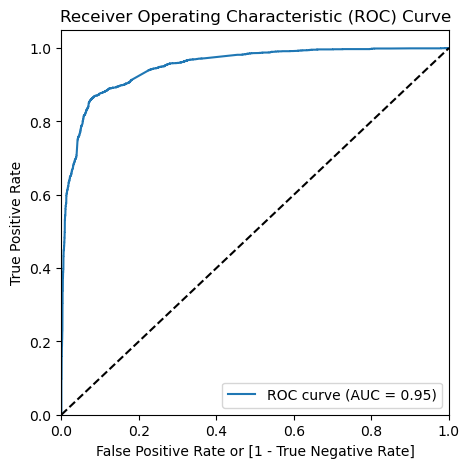

In [87]:
# let's plot the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(prediction_df.Converted, prediction_df.Converted_Prob, drop_intermediate = False)
plot_roc_curve(prediction_df.Converted, prediction_df.Converted_Prob)

### Determining the Optimal Cutoff Point

In [88]:
# Create columns with different probability thresholds
prob_thresholds = [float(x)/10 for x in range(10)]
for threshold in prob_thresholds:
    prediction_df[threshold] = prediction_df.Converted_Prob.map(lambda x: 1 if x > threshold else 0)
prediction_df.head()


Converted  Converted_Prob  Customer_ID  predicted  0.0  0.1  0.2  0.3  \
7963          1        0.973590         7963          1    1    1    1    1   
5521          0        0.099762         5521          0    1    0    0    0   
1951          1        0.947498         1951          1    1    1    1    1   
1553          1        0.725610         1553          1    1    1    1    1   
9170          0        0.009280         9170          0    1    0    0    0   

      0.4  0.5  0.6  0.7  0.8  0.9  
7963    1    1    1    1    1    1  
5521    0    0    0    0    0    0  
1951    1    1    1    1    1    1  
1553    1    1    1    1    0    0  
9170    0    0    0    0    0    0

In [89]:
# Calculate accuracy, sensitivity, and specificity for various probability thresholds.
cutoff_df = pd.DataFrame(columns = ['prob', 'accuracy', 'sensitivity', 'specificity'])

thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for threshold in thresholds:
    cm = metrics.confusion_matrix(prediction_df.Converted, prediction_df[threshold])
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
    cutoff_df.loc[threshold] = [threshold, accuracy, sensitivity, specificity]
cutoff_df

prob  accuracy  sensitivity  specificity
0.0   0.0  0.384652     1.000000     0.000000
0.1   0.1  0.780132     0.968584     0.662331
0.2   0.2  0.827056     0.945736     0.752869
0.3   0.3  0.873195     0.892289     0.861260
0.4   0.4  0.895166     0.870257     0.910737
0.5   0.5  0.896108     0.841289     0.930375
0.6   0.6  0.891243     0.808242     0.943127
0.7   0.7  0.864093     0.709506     0.960724
0.8   0.8  0.846987     0.632395     0.981127
0.9   0.9  0.814658     0.532844     0.990819

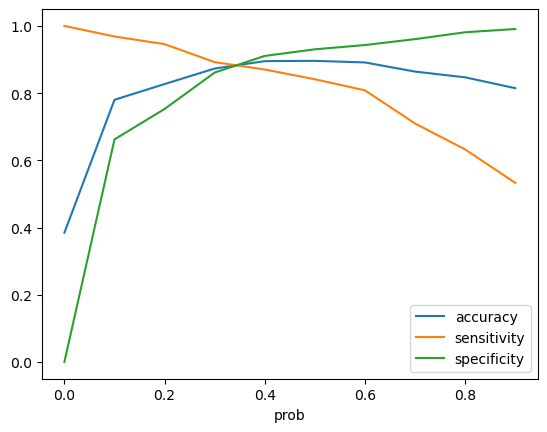

In [90]:
# let's plot accuracy, sensitivity, and specificity for different probabilities
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])
plt.show()

### <font color= red> According to the plot above, the best cutoff probability is 0.35.


In [91]:
# Make predictions on the training set using the final model
prediction_df['final_predicted'] = prediction_df.Converted_Prob.apply(lambda x: 1 if x > 0.35 else 0)
prediction_df.head()

Converted  Converted_Prob  Customer_ID  predicted  0.0  0.1  0.2  0.3  \
7963          1        0.973590         7963          1    1    1    1    1   
5521          0        0.099762         5521          0    1    0    0    0   
1951          1        0.947498         1951          1    1    1    1    1   
1553          1        0.725610         1553          1    1    1    1    1   
9170          0        0.009280         9170          0    1    0    0    0   

      0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
7963    1    1    1    1    1    1                1  
5521    0    0    0    0    0    0                0  
1951    1    1    1    1    1    1                1  
1553    1    1    1    1    0    0                1  
9170    0    0    0    0    0    0                0

In [92]:
# Calculate the total accuracy of the model
total_accuracy = metrics.accuracy_score(prediction_df.Converted, prediction_df.final_predicted)
total_accuracy

0.8874764595103578

In [93]:
# Create a confusion matrix to see how the model performed
confusion_matrix = metrics.confusion_matrix(prediction_df.Converted, prediction_df.final_predicted)
confusion_matrix


array([[3498,  423],
       [ 294, 2157]], dtype=int64)

In [94]:
TP = confusion_matrix[1,1] # True positives
TN = confusion_matrix[0,0] # True negatives
FP = confusion_matrix[0,1] # False positives
FN = confusion_matrix[1,0] # False negatives

print("Sensitivity or True Positive Rate of our logistic regression model : ", TP / float(TP + FN))
print("Specificity or True Negative Rate                                  : ",TN / float(TN + FP))
print("False Positive Rate                                                : ",FP / float(TN + FP))
print("Positive Predictive Value                                          : ",TP / float(TP + FP))
print("Negative Predictive Value                                          : ",TN / float(TN + FN))

Sensitivity or True Positive Rate of our logistic regression model :  0.8800489596083231
Specificity or True Negative Rate                                  :  0.8921193573068095
False Positive Rate                                                :  0.10788064269319052
Positive Predictive Value                                          :  0.836046511627907
Negative Predictive Value                                          :  0.9224683544303798


## Let's evaluate Precision and Recall

#### Precision

In [95]:
precision_score(prediction_df.Converted, prediction_df.predicted)

0.8830835117773019

#### Recall

In [96]:
recall_score(prediction_df.Converted, prediction_df.predicted)

0.8412892696858425

<font color=blue>While the precision-recall threshold stands at 0.41, our priority is to optimize sensitivity. Hence, we will be using the threshold determined by accuracy, sensitivity, and specificity, which is 0.35.

## Trade-off between Precision and Recall


In [97]:
# Compute Precision-Recall pairs for different probability thresholds 
precision_score, recall_score, thresholds = precision_recall_curve(prediction_df.Converted, prediction_df.Converted_Prob)

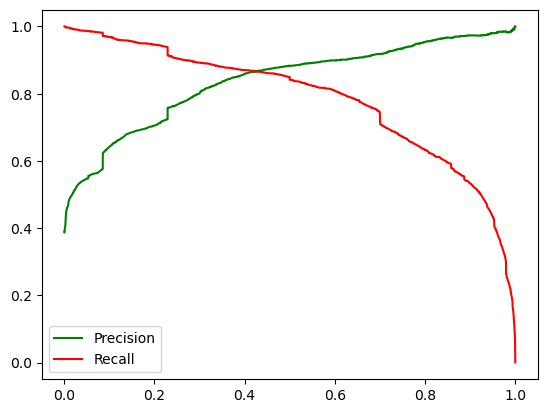

In [98]:
# Plot the Precision-Recall curve
plt.plot(thresholds, precision_score[:-1], 'g-', label='Precision')
plt.plot(thresholds, recall_score[:-1], 'r-', label='Recall')
plt.legend()
plt.show()

 <font color=blue> 
    Note:     
    
While the precision-recall threshold stands at 0.41, our priority is to optimize sensitivity. Hence, we will be using the threshold determined by accuracy, sensitivity, and specificity, which is 0.35.

# Predictions on the test dataset

In [99]:
# Apply standardization to the specific columns of test set
columns_to_standardize = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_test[columns_to_standardize] = scaler_instance.transform(X_test[columns_to_standardize])
X_test = X_test[col]

In [100]:
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
3497                    -0.890832                                    0   
4044                    -0.890832                                    0   
7200                    -0.617119                                    0   
1183                    -0.890832                                    0   
8216                    -0.826966                                    0   

      Lead Origin_Lead Add Form  Last Activity_Email Bounced  \
3497                          1                            0   
4044                          0                            0   
7200                          0                            0   
1183                          0                            1   
8216                          0                            0   

      Specialization_Other_Specialization  \
3497                                    0   
4044                                    0   
7200                                    1   
1183                                    1   
8216                                    1   

      What is your current occupation_Working Professional  Tags_Busy  \
3497                                                  0             0   
4044                                                  0             0   
7200                                                  0             0   
1183                                                  0             0   
8216                                                  0             0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Ringing  \
3497                        0                  0             0   
4044                        0                  0             0   
7200                        0                  0             0   
1183                        0                  0             0   
8216                        0                  0             0   

      Tags_Will revert after reading the email  Tags_switched off  \
3497                                         1                  0   
4044                                         1                  0   
7200                                         0                  0   
1183                                         0                  0   
8216                                         1                  0   

      Last Notable Activity_Modified  \
3497                               0   
4044                               0   
7200                               1   
1183                               1   
8216                               0   

      Last Notable Activity_Olark Chat Conversation  \
3497                                              0   
4044                                              0   
7200                                              0   
1183                                              0   
8216                                              0   

      Last Notable Activity_Page Visited on Website  \
3497                                              0   
4044                                              0   
7200                                              0   
1183                                              0   
8216                                              1   

      Last Notable Activity_SMS Sent  
3497                               0  
4044                               1  
7200                               0  
1183                               0  
8216                               0

In [101]:
# let's add the constant to test set
X_test_sm = sm.add_constant(X_test)

In [102]:
y_test_pred = result.predict(X_test_sm)
y_test_pred.head(10)

3497    0.952942
4044    0.886682
7200    0.003924
1183    0.000829
8216    0.115563
8746    0.009280
9047    0.124315
6526    0.983514
7694    0.229242
8184    0.967743
dtype: float64

In [103]:
# Transform y_test_pred into a DataFrame
pred_df = pd.DataFrame(y_test_pred)
pred_df.head()

0
3497  0.952942
4044  0.886682
7200  0.003924
1183  0.000829
8216  0.115563

In [104]:
# Change y_test to a DataFrame and assign CustID to the index
test_df = pd.DataFrame(y_test)
test_df['CustID'] = test_df.index

In [105]:
# Concatenate test_df and pred_df
pred_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
final_pred_df = pd.concat([test_df, pred_df], axis=1)
final_pred_df.head()

Converted  CustID         0
0          1    3497  0.952942
1          1    4044  0.886682
2          0    7200  0.003924
3          0    1183  0.000829
4          0    8216  0.115563

In [106]:
# let's rename the column
final_pred_df = final_pred_df.rename(columns={0: 'Prob_Converted'})

In [107]:
# Reorder the columns
final_pred_df = final_pred_df[['CustID', 'Converted', 'Prob_Converted']]
final_pred_df.head()

CustID  Converted  Prob_Converted
0    3497          1        0.952942
1    4044          1        0.886682
2    7200          0        0.003924
3    1183          0        0.000829
4    8216          0        0.115563

In [108]:
# Create 'final_predicted' column using .35 as the cutoff for 'Converted_Prob'
final_pred_df['final_predicted'] = final_pred_df['Prob_Converted'].apply(lambda val: 1 if val > 0.35 else 0)
final_pred_df.head()

CustID  Converted  Prob_Converted  final_predicted
0    3497          1        0.952942                1
1    4044          1        0.886682                1
2    7200          0        0.003924                0
3    1183          0        0.000829                0
4    8216          0        0.115563                0

In [109]:
#model accuracy
metrics.accuracy_score(final_pred_df.Converted, final_pred_df.final_predicted)

0.8989381179055291

In [110]:
confusion_matrix = metrics.confusion_matrix(final_pred_df.Converted, final_pred_df.final_predicted )
confusion_matrix

array([[1571,  159],
       [ 117,  884]], dtype=int64)

In [111]:
# Assigning values from the confusion matrix
TP = confusion_matrix[1,1] # True Positives
TN = confusion_matrix[0,0] # True Negatives
FP = confusion_matrix[0,1] # False Positives
FN = confusion_matrix[1,0] # False Negatives


print("Sensitivity or True Positive Rate of our logistic regression model : ", TP / float(TP + FN))
print("Specificity or True Negative Rate                                  : ",TN / float(TN + FP))
print("False Positive Rate                                                : ",FP / float(TN + FP))
print("Positive Predictive Value                                          : ",TP / float(TP + FP))
print("Negative Predictive Value                                          : ",TN / float(TN + FN))

Sensitivity or True Positive Rate of our logistic regression model :  0.8831168831168831
Specificity or True Negative Rate                                  :  0.9080924855491329
False Positive Rate                                                :  0.09190751445086705
Positive Predictive Value                                          :  0.8475551294343241
Negative Predictive Value                                          :  0.9306872037914692


In [112]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1736.5
Date:                Mon, 17 Jul 2023   Deviance:                       3473.0
Time:                        18:21:35   Pearson chi2:                 1.19e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5450
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5105      0.230    -10.895      0.000      -2.962      -2.059
Total Time Spent on Website                              1.0642      0.048     22.074      0.000       0.970       1.159
Lead Origin_Landing Page Submission                     -1.3671      0.144     -9.474      0.000      -1.650      -1.084
Lead Origin_Lead Add Form                                3.0088      0.265     11.346      0.000       2.489       3.528
Last Activity_Email Bounced                             -1.2667      0.347     -3.651      0.000      -1.947      -0.587
Specialization_Other_Specialization                     -1.2120      0.143     -8.448      0.000      -1.493      -0.931
What is your current occupation_Working Professional     2.5377      0.266      9.555      0.000       2.017       3.058
Tags_Busy                                                3.1989      0.295     10.845      0.000       2.621       3.777
Tags_Closed by Horizzon                                  8.9448      1.035      8.647      0.000       6.917      10.972
Tags_Lost to EINS                                        8.5327      0.760     11.233      0.000       7.044      10.021
Tags_Ringing                                            -1.2365      0.298     -4.150      0.000      -1.821      -0.653
Tags_Will revert after reading the email                 3.4580      0.205     16.875      0.000       3.056       3.860
Tags_switched off                                       -2.1015      0.759     -2.768      0.006      -3.589      -0.614
Last Notable Activity_Modified                          -1.1574      0.105    -11.059      0.000      -1.363      -0.952
Last Notable Activity_Olark Chat Conversation           -1.6634      0.361     -4.606      0.000      -2.371      -0.956
Last Notable Activity_Page Visited on Website           -0.8905      0.250     -3.558      0.000      -1.381      -0.400
Last Notable Activity_SMS Sent                           2.0579      0.121     17.060      0.000       1.821       2.294
========================================================================================================================
"""

**🔔 Summary: Key Factors Influencing Lead Conversion 🔔**

We've identified several major contributors to lead conversion based on our analysis. Here they are, along with their respective coefficients:

🔹 **Tags_Closed by Horizzon:** Coefficient - 8.9448 

🔹 **Tags_Lost to EINS:** Coefficient - 8.5327

🔹 **Tags_Will revert after reading the email:** Coefficient - 3.4580

🔹 **Tags_Busy:** Coefficient - 3.1989

🔹 **Lead Origin_Lead Add Form:** Coefficient - 3.0088

🔹 **What is your current occupation_Working Professional:** Coefficient - 2.5377

🔹 **Last Notable Activity_SMS Sent:** Coefficient - 2.0579

These attributes represent the most influential drivers of lead conversion. Optimizing these factors could significantly increase the conversion rate.